## Data Wrangling

In [31]:
import seaborn as sns
import pandas as pd
import numpy as np

In [32]:
df = pd.read_csv('dataset/student_scores.csv')
df['Scores'] = df['Scores'] # multiple to -1 to make this negatively correlated
df.head(3)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27


In [33]:
df.isna().sum()

Hours     0
Scores    0
dtype: int64

In [34]:
import plotly.express as px
fig = px.scatter(data_frame=df, x='Hours',y='Scores',width=700)
fig.update_layout(title='Regression of total_bill vs tip')
fig.show()

In [35]:
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


## Least Mean Square Model

### Least Mean Square Formula: $y = mx + b$

In [36]:
y,m,x,b = [0] * 4 # initiate all value with 0

Find $ m = \frac {N * \sum\limits _{i=1} ^{N} (x_{i}y_{i}) - \sum\limits _{i=1} ^{N} x_{i}\sum\limits _{i=1} ^{N} y_{i}} {N * \sum\limits _{i=1} ^{N} (x_{i} ^ 2) - \sum\limits _{i=1} ^{N} (x_{i})^2} $ 

In [37]:
x = df['Hours'].values
y = df['Scores'].values

In [38]:
N = len(x)
m = ((N * sum(x * y)) - (sum(x) * sum(y)) ) / (N * sum(x**2) - sum(x) ** 2) # get the slope (m)
m

9.77580339078746

In [39]:
b = (sum(y) - m * sum(x))/ N # get the y-intercept
b

2.483673405373247

In [40]:

y_hat = m * x + b

In [41]:
import plotly.graph_objects as go

fig =go.Figure()
fig.add_trace(go.Scatter(x=x, y=y, mode='markers', name='dataset'))
fig.add_trace(go.Scatter(x=x, y=y_hat, mode='lines+markers', name='y hat'))
fig.update_xaxes(title_text='Hours')
fig.update_yaxes(title_text='Scores')
fig.update_layout(width=700, title='Statistical Linear Regression')
fig.show()

In [42]:
mae = sum(abs(y-y_hat))/N 
mae

4.972805319866373

In [43]:
mse = sum((y-y_hat)**2)/N 
mse

28.882730509245466

In [44]:
rmse = mse ** 0.5
rmse

5.374265578592619

In [45]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


mae = mean_absolute_error(y, y_hat)
mse = mean_squared_error(y, y_hat)
rmse = np.sqrt(mse)
corr = r2_score(y, y_hat)
correlation_coefficient = np.corrcoef(x.flatten(), y.flatten())[0, 1]


print(f'Mean absolute error: {mae:.2f}')
print(f'Mean squared error: {mse:.2f}')
print(f'Root mean squared error: {rmse:.2f}')
print(f'Coefficient of Determination(R2): {corr}') # [-1,1]
print(f'Correlation Coefficient: {correlation_coefficient}')


Mean absolute error: 4.97
Mean squared error: 28.88
Root mean squared error: 5.37
Coefficient of Determination(R2): 0.9529481969048356
Correlation Coefficient: 0.9761906560220887


## sk-learn Linear Regression Model

In [46]:
X = df['Hours'].values.reshape(-1, 1) # turn this into 2d matrix
y = df['Scores'].values.reshape(-1, 1) # turn this into 2d matrix

In [47]:
df['Scores'].values

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86], dtype=int64)

In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [49]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
print(model.intercept_)
print(model.coef_)

[2.82689235]
[[9.68207815]]


In [50]:
score = model.coef_[0][0] * X_train + model.intercept_[0]
score

array([[28.96850337],
       [34.77775026],
       [52.20549094],
       [39.61878934],
       [17.35000959],
       [33.80954245],
       [46.39624405],
       [88.99738793],
       [85.12455667],
       [36.71416589],
       [28.96850337],
       [21.22284085],
       [49.3008675 ],
       [61.8875691 ],
       [78.34710196],
       [56.0783222 ],
       [77.37889414],
       [13.47717832],
       [74.4742707 ],
       [91.90201137]])

In [51]:
# inference manually by taking slope(m) and y-intercept (b) manually
y_pred = model.coef_[0][0] * X_test + model.intercept_[0]
y_pred

# # or you can just use sklearn model.predict
# y_pred = model.predict(X_test)
# y_pred

array([[83.18814104],
       [27.03208774],
       [27.03208774],
       [69.63323162],
       [59.95115347]])

In [52]:
fig =go.Figure()
fig.add_trace(go.Scatter(x=X_train.flatten(), y=y_train.flatten(), mode='markers', name='data train'))
fig.add_trace(go.Scatter(x=X_test.flatten(), y=y_test.flatten(), mode='markers', name='data test'))
fig.add_trace(go.Scatter(x=X_test.flatten(), y=y_pred.flatten(), mode='lines+markers', name='y hat'))
fig.update_xaxes(title_text='Hours')
fig.update_yaxes(title_text='Scores')
fig.update_layout(width=700, title='Train, Test, Pred')
fig.show()

In [53]:
df_preds = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df_preds

,Actual,Predicted
0,81,83.188141
1,30,27.032088
2,21,27.032088
3,76,69.633232
4,62,59.951153


In [54]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
corr = r2_score(y_test, y_pred)
correlation_coefficient = np.corrcoef(X_test.flatten(), y_test.flatten())[0, 1]


print(f'Mean absolute error: {mae:.2f}')
print(f'Mean squared error: {mse:.2f}')
print(f'Root mean squared error: {rmse:.2f}')
print(f'Coefficient of Determination(R2): {corr}') # [-1,1]
print(f'Correlation Coefficient: {correlation_coefficient}')


Mean absolute error: 3.92
Mean squared error: 18.94
Root mean squared error: 4.35
Coefficient of Determination(R2): 0.9678055545167994
Correlation Coefficient: 0.9852891547134041


## sk-learn Linear Regression Model (all data)

In [55]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X, y) # take all of X and all of y (without splitting it to train and test)
print(model.intercept_)
print(model.coef_)

[2.48367341]
[[9.77580339]]


In [56]:
# # inference manually by taking slope(m) and y-intercept (b) manually
# y_pred_all = model.coef_[0][0] * X + model.intercept_[0]
# y_pred_all

# or you can just use sklearn model.predict
y_pred_all = model.predict(X)
y_pred_all

array([[26.92318188],
       [52.3402707 ],
       [33.76624426],
       [85.57800223],
       [36.69898527],
       [17.14737849],
       [92.4210646 ],
       [56.25059205],
       [83.62284155],
       [28.87834256],
       [77.75735951],
       [60.16091341],
       [46.47478866],
       [34.74382459],
       [13.23705714],
       [89.48832358],
       [26.92318188],
       [21.05769985],
       [62.11607409],
       [74.8246185 ],
       [28.87834256],
       [49.40752968],
       [39.63172629],
       [69.9367168 ],
       [78.73493985]])

In [57]:
mae = mean_absolute_error(y, y_pred_all)
mse = mean_squared_error(y, y_pred_all)
rmse = np.sqrt(mse)
corr = r2_score(y, y_pred_all)
correlation_coefficient = np.corrcoef(X.flatten(), y.flatten())[0, 1]


print(f'Mean absolute error: {mae:.2f}')
print(f'Mean squared error: {mse:.2f}')
print(f'Root mean squared error: {rmse:.2f}')
print(f'Coefficient of Determination(R2): {corr}')
print(f'Correlation Coefficient: {correlation_coefficient}')


Mean absolute error: 4.97
Mean squared error: 28.88
Root mean squared error: 5.37
Coefficient of Determination(R2): 0.9529481969048356
Correlation Coefficient: 0.9761906560220887


## Simple Linear Regression Plot

### Searbon

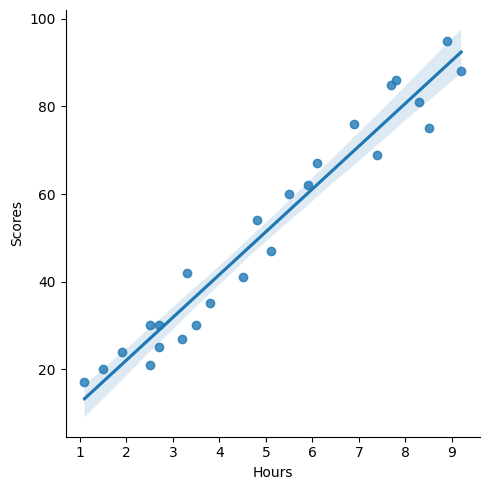

In [58]:
sns.lmplot(data=df,x='Hours',y='Scores')

<Axes: xlabel='Hours', ylabel='Scores'>

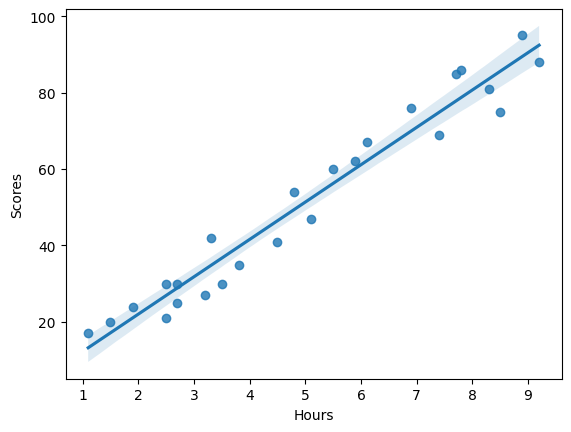

In [59]:
sns.regplot(data=df,x='Hours',y='Scores')

## Metrics Explanation

### Understanding Correlation Coefficients and Coefficient of Determination

#### 1. Correlation Coefficient: "How good is this predictor?"

Correlation coefficients help quantify the mutual relationships or connections between two variables. Some examples include:
- Weight and height of humans
- House value and its area
- A store’s revenue and its parking lot occupancy

###### Pearson Correlation Coefficient (r)
One of the most widely used correlation coefficients is the **Pearson correlation coefficient** (denoted by **r**). This can be understood as “how close is the data to the line of best fit?”

- If the points are **far away** from the line, **r** is close to **0**
- If the points are **close** to the line and the line slopes **upward**, **r** is close to **+1**
- If the points are **close** to the line and the line slopes **downward**, **r** is close to **−1**

> **Note**: The Pearson correlation coefficient is **independent of the magnitude** of the numbers, focusing on **relative changes**. This can be helpful, but also potentially misleading when the variables are expected to have the same magnitude.

### Misuse of r²
Some people take the square of the Pearson correlation coefficient (**r²**) to bring it between **0** and **+1**, but this is **not** the same as the **coefficient of determination (R²)**.

---

#### 2. Coefficient of Determination: "How good is this model?"

Unlike the Pearson correlation coefficient, the **coefficient of determination** measures how well the **predicted values match** the observed values. 

- **R² = +1**: Predictions match the observations perfectly.
- **R² = 0**: Predictions are as good as random guesses.
- **R² < 0**: Predictions are worse than random guesses.

> **Note**: Unlike **r²**, the coefficient of determination is based on the **distance** between the points and the **1:1 line** (and not the line of best fit). It **does depend on the magnitude** of the numbers.

---

##### Summary

- **r**: How close is the data to the line of best fit? Independent of magnitude.
- **R²**: How well do the predicted values match the observed values? Depends on magnitude.


### Regression Evaluation Metrics


Here are three common evaluation metrics for regression problems:

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

Comparing these metrics:

- **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.

All of these are **loss functions**, because we want to minimize them.